In [83]:
#importing
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Black-Scholes option pricing

In [110]:
#stock
#current price
S = 100
#Strike price
K = 99

#interest
r = 0.06

#volatility 
sigma = 0.20

#time to maturity (in years)
T = 1


#pay-off at maturity
#max(S(T) - K, 0)

#defining d1 and d2
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2)*T)/sigma*np.sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

#Black-Scholes
def Call(S, K, T, r, sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))


#hedge parameter
delta_t = norm.cdf(d1(S,K,T,r,sigma))


print("d1 = " , d1(S,K,T,r,sigma))
print("d2 = ", d2(S,K,T,r,sigma))
print("option price = ", Call(S, K, T, r, sigma))
print("hedge parameter = ", delta_t)


d1 =  0.4502516792675075
d2 =  0.25025167926750747
option price =  11.544280227051097
hedge parameter =  0.6737355117348961


# Settting up stock paths

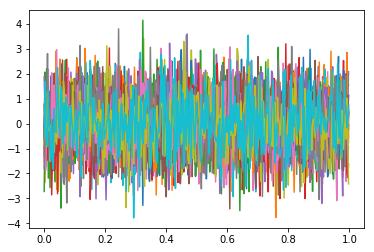

In [113]:
#timesteps to maturity
nsteps = 365
timesteps = np.linspace(0, T, nsteps)
y = []
dt = T/nsteps

for x in range(20):
    y.append([])
    for i in range(nsteps):
        z = np.random.normal(0, 1)
        dZ = z*np.sqrt(dt)
        dS = r*S*dt + sigma*S*dZ
        y[x].append(dS)

plt.figure()
for i in range(20):
    plt.plot(timesteps, y[i])
plt.show()

prices = []

for x in range(nsteps):
    T = x/365
    y = Call(S,K,T,r,sigma)
    prices.append(y)

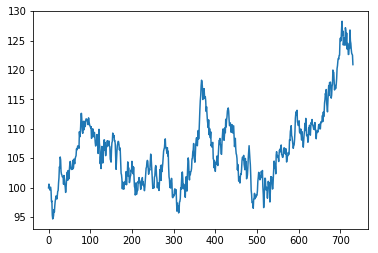

In [122]:
#stock dynamics

def stockprices(S, r, sigma, dt):
    t = np.linspace(0, 1, N+1)
    prices = [S0]
    dZ = np.random.normal(0, 1)*np.sqrt(dt)        
    return S + r*S*dt + sigma*S*dZ

#inputs
S0 = 100
r = 0.06
sigma = 0.2
T = 1
N = 365

for i in range(N):
    prices.append(stockprices(prices[-1], r, sigma, T/N))
    
plt.plot(prices)


In [129]:
#hedge parameter over time
def deltas(S,K,T,t,r,sigma):
    deltas_over_time = []
    deltas_over_time.append(norm.cdf(d1(S,K,T,r,sigma)))
    for i in range t
    return deltas_over_time


print(deltas(S,K,T,r,sigma))

[0.6737355117348961]
